In [4]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# reload imports jupyter magic
%load_ext autoreload
%autoreload 2


# hack to import functions from scripts folder
sys.path.append("scripts/")

# Mute some soon deprectaed datetime warning from pandas
warnings.filterwarnings("ignore")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Import local packages
from scripts.load_data import load_postings, load_votes, get_first_contact_df, subset_users
from scripts.graph_analyis import create_graph, compute_overlap, user_lookup_df, compute_similarity, compute_time_base_similiarities

In [8]:
# Load data
votes = load_votes("input/")
postings = load_postings("input/")
votes = votes.sort_values("VoteCreatedAt")
postings["num_interactions"] = postings.groupby(
    "UserCommunityName")["PostingCreatedAt"].cumcount()

Votes loaded
Postings loaded


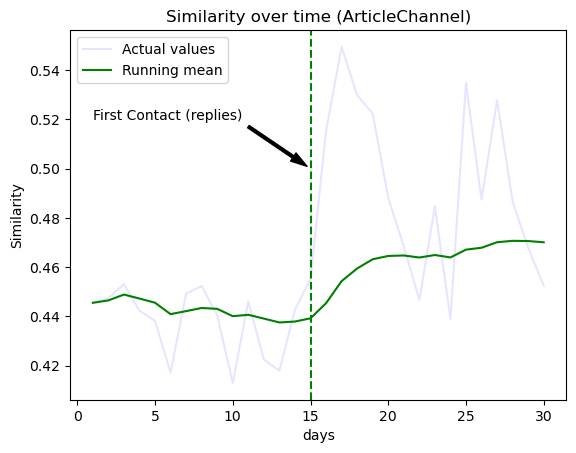

<Figure size 640x480 with 0 Axes>

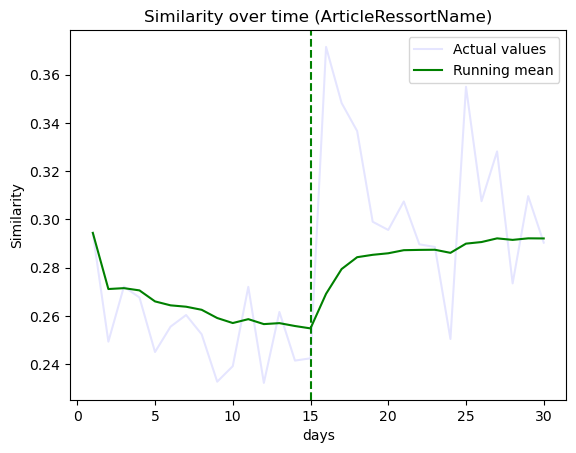

<Figure size 640x480 with 0 Axes>

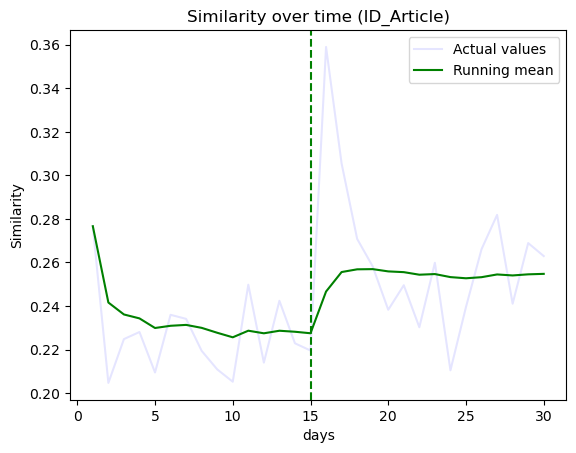

<Figure size 640x480 with 0 Axes>

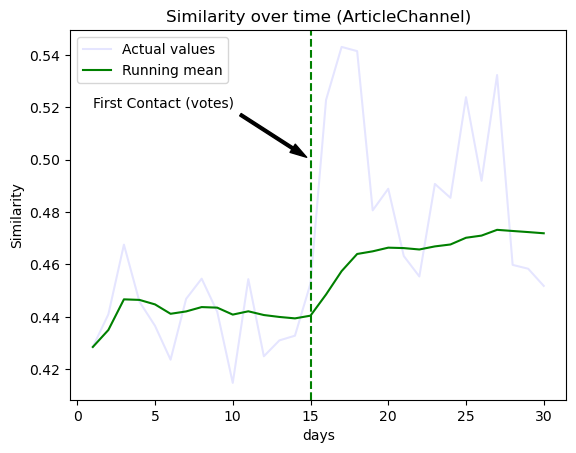

<Figure size 640x480 with 0 Axes>

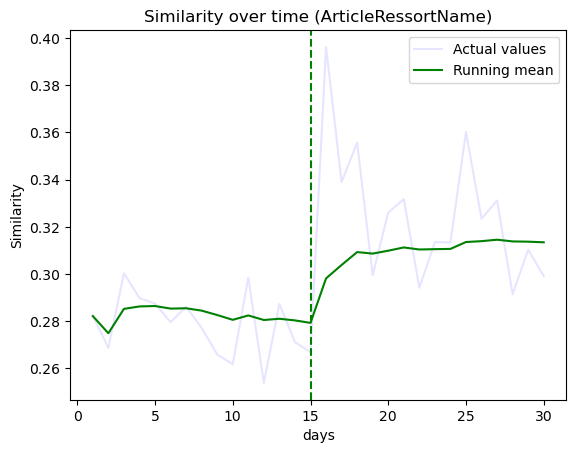

<Figure size 640x480 with 0 Axes>

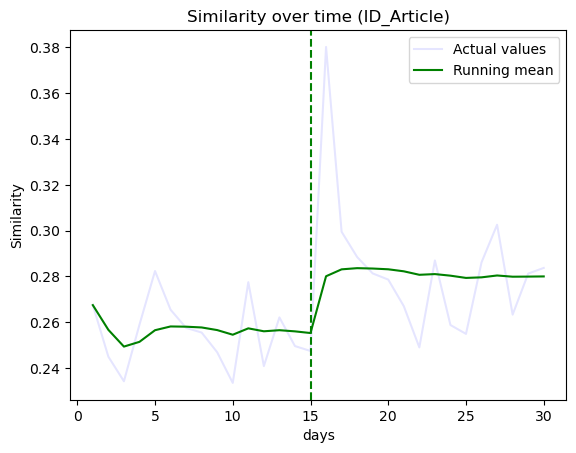

<Figure size 640x480 with 0 Axes>

In [13]:
for interaction_type in ["replies", "votes"]:
    # Select users based on interaction type
    user_selection, uu_first_contact_tuples = subset_users(
        votes=votes, postings=postings, interaction_type=interaction_type, num_days_min=30, firt_interaction_middle=True)

    # Select postings based on user selection
    selected_postings = (postings[postings["UserCommunityName"]
                         .isin(user_selection)]
                         .sort_values("PostingCreatedAt")
                         .assign(UserCommunityName=lambda x: "user_" + x["UserCommunityName"]))

    for simmilarity_type in ["ArticleChannel", "ArticleRessortName", "ID_Article"]:
        # Select postings based on user selection
        time_similarity, time_similarity_running = compute_time_base_similiarities(
            selected_postings=selected_postings, article_or_ressort=simmilarity_type, uu_first_contact_tuples=uu_first_contact_tuples)

        fig, ax = plt.subplots()

        ax.annotate(f'First Contact ({interaction_type})', xy=(15, 0.5), xytext=(1, 0.52),
                    arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=7))

        plt.title(f'Similarity over time ({simmilarity_type})')
        plt.xlabel("days")
        plt.ylabel("Similarity")
        plt.plot(range(1, 31), time_similarity, alpha=0.1, color="blue")
        plt.plot(range(1, 31), time_similarity_running, color="green")
        plt.legend(["Actual values", "Running mean"])
        plt.axvline(x=15, color="green", linestyle="--")
        plt.show()
        plt.clf()
